# Space X Falcon 9 First Stage Landing Prediction

In [7]:
# !pip3 install beautifulsoup4
# !python.exe -m pip install --upgrade pipb



  Using cached folium-0.17.0-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached branca-0.7.2-py3-none-any.whl.metadata (1.5 kB)
Using cached folium-0.17.0-py2.py3-none-any.whl (108 kB)
Using cached branca-0.7.2-py3-none-any.whl (25 kB)


In [8]:
import sys
import requests
import pandas as pd  
import re 
from bs4 import BeautifulSoup
import unicodedata
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import FileLink
import folium

# fetching data from api 

In [9]:
sta = "https://api.spacexdata.com/v4/rockets/"
# sta_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"
response=requests.get(sta)
response.content
if response.status_code == 200:
    data = response.json()
    df = pd.json_normalize(data)
    print(df)
else:
    print(f"Failed to retrieve data: {response.status_code}")
    


                                                                                                                                                                                                                                                                           payload_weights  \
0                                                                                                                                                                                                                         [{'id': 'leo', 'name': 'Low Earth Orbit', 'kg': 450, 'lb': 992}]   
1                                                                      [{'id': 'leo', 'name': 'Low Earth Orbit', 'kg': 22800, 'lb': 50265}, {'id': 'gto', 'name': 'Geosynchronous Transfer Orbit', 'kg': 8300, 'lb': 18300}, {'id': 'mars', 'name': 'Mars Orbit', 'kg': 4020, 'lb': 8860}]   
2  [{'id': 'leo', 'name': 'Low Earth Orbit', 'kg': 63800, 'lb': 140660}, {'id': 'gto', 'name': 'Geosynchronous Transfer Orbit', 'kg': 26700, '

In [5]:

print("Status Code:", response.status_code)


print("Content:", response.content)



Status Code: 200
Content: b'[{"height":{"meters":22.25,"feet":73},"diameter":{"meters":1.68,"feet":5.5},"mass":{"kg":30146,"lb":66460},"first_stage":{"thrust_sea_level":{"kN":420,"lbf":94000},"thrust_vacuum":{"kN":480,"lbf":110000},"reusable":false,"engines":1,"fuel_amount_tons":44.3,"burn_time_sec":169},"second_stage":{"thrust":{"kN":31,"lbf":7000},"payloads":{"composite_fairing":{"height":{"meters":3.5,"feet":11.5},"diameter":{"meters":1.5,"feet":4.9}},"option_1":"composite fairing"},"reusable":false,"engines":1,"fuel_amount_tons":3.38,"burn_time_sec":378},"engines":{"isp":{"sea_level":267,"vacuum":304},"thrust_sea_level":{"kN":420,"lbf":94000},"thrust_vacuum":{"kN":480,"lbf":110000},"number":1,"type":"merlin","version":"1C","layout":"single","engine_loss_max":0,"propellant_1":"liquid oxygen","propellant_2":"RP-1 kerosene","thrust_to_weight":96},"landing_legs":{"number":0,"material":null},"payload_weights":[{"id":"leo","name":"Low Earth Orbit","kg":450,"lb":992}],"flickr_images":["ht

In [6]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [7]:
def getBoosterVersion(data):
   
    # for x in ['rocket']:
    #     if x:
    #         try:
    #             response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
    #             response.raise_for_status() 
    #             rocket_data = response.json()
    #             BoosterVersion.append(rocket_data['name'])
    #         except requests.exceptions.RequestException as e:
    #             print(f"Error fetching data for rocket ID {x}: {e}")
 
 
 
 
 
 
 for rocket_id in data:
        try:
            response = requests.get(f"https://api.spacexdata.com/v4/rockets/{rocket_id}")
            response.raise_for_status()
            print(f"Status Code: {response.status_code}")
            
            
            if response.content: 
                rocket_data = response.json()
                BoosterVersion.append(rocket_data['name'])
            else:
                print(f"No data returned for rocket ID {rocket_id}")
        except requests.exceptions.RequestException as e:
            print(f"Error fetching data for rocket ID {rocket_id}: {e}")
  



In [8]:
def launch_site(data):
    for x in data['launchpad']:
        if x:
            try:
                response= requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
                response.raise_for_status()
                Longitude.append(response['longitude'])
                Latitude.append(response['latitude'])
                LaunchSite.append(response['name'])
            except requests.exceptions.RequestException as e:
                print(f"Error fetching data for rocket ID {x}: {e}")
                
  
    


    

In [9]:
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [10]:
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json_normailize()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])
        
 

In [11]:
getBoosterVersion(data)

Error fetching data for rocket ID {'height': {'meters': 22.25, 'feet': 73}, 'diameter': {'meters': 1.68, 'feet': 5.5}, 'mass': {'kg': 30146, 'lb': 66460}, 'first_stage': {'thrust_sea_level': {'kN': 420, 'lbf': 94000}, 'thrust_vacuum': {'kN': 480, 'lbf': 110000}, 'reusable': False, 'engines': 1, 'fuel_amount_tons': 44.3, 'burn_time_sec': 169}, 'second_stage': {'thrust': {'kN': 31, 'lbf': 7000}, 'payloads': {'composite_fairing': {'height': {'meters': 3.5, 'feet': 11.5}, 'diameter': {'meters': 1.5, 'feet': 4.9}}, 'option_1': 'composite fairing'}, 'reusable': False, 'engines': 1, 'fuel_amount_tons': 3.38, 'burn_time_sec': 378}, 'engines': {'isp': {'sea_level': 267, 'vacuum': 304}, 'thrust_sea_level': {'kN': 420, 'lbf': 94000}, 'thrust_vacuum': {'kN': 480, 'lbf': 110000}, 'number': 1, 'type': 'merlin', 'version': '1C', 'layout': 'single', 'engine_loss_max': 0, 'propellant_1': 'liquid oxygen', 'propellant_2': 'RP-1 kerosene', 'thrust_to_weight': 96}, 'landing_legs': {'number': 0, 'material':

 * ***here we have encountred a problem so lets get the data by using webscrapping***

# Webscraping using pandas 

In [12]:
url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"



In [13]:
try:
    df = pd.read_html(url)
except Exception as e:
    print(f"An error occurred: {e}")

In [14]:
response= requests.get(url)

In [15]:
soup= BeautifulSoup(response.content,"html.parser")

In [16]:
title = soup.title
print(f"Title of the page: {title}")

Title of the page: <title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>


In [17]:
html_table = soup.find_all('table')

In [18]:
print(f'number of tables found :{len(html_table)}')
# html_table

number of tables found :25


In [19]:
first_launch = html_table[2]
print(first_launch)

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11"><span class="cite-bracket">[</span>b<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12"><span class="cite-bracket">[</span>c<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 

In [20]:
columns_names=[]
def extract_column_from_header(th):
    return th.text.strip()
 
for th in first_launch.find_all('th'):
    name = extract_column_from_header(th)
    if name is not None and len(name) > 0: 
        columns_names.append(name)

In [21]:
print(f"columns_names: {columns_names}")

columns_names: ['Flight No.', 'Date andtime (UTC)', 'Version,Booster [b]', 'Launch site', 'Payload[c]', 'Payload mass', 'Orbit', 'Customer', 'Launchoutcome', 'Boosterlanding', '1', '2', '3', '4', '5', '6', '7']


In [22]:
launch = dict.fromkeys(columns_names)

In [23]:
del launch['Date andtime (UTC)']

In [24]:
launch['Flight No.'] = []
launch['Launch site'] = []
launch['Payload'] = []
launch['Payload mass'] = []
launch['Orbit'] = []
launch['Customer'] = []
launch['Launch outcome'] = []
# make the keys an empty lists 

In [25]:
launch['Version Booster']=[]
launch['Booster landing']=[]
launch['Date']=[]
launch['Time']=[]
# add new keys

In [26]:
def date_time(cell):
    return cell.text.strip().split()

def booster_version(cell):
    return cell.text.strip()

def get_mass(cell):
    return cell.text.strip()

def landing_status(cell):
    return cell.text.strip()

In [27]:
extracted_row = 0

# Extract each table
for table_number, table in enumerate(soup.find_all('table', class_="wikitable plainrowheaders collapsible")):
    for rows in table.find_all("tr"):
        if rows.th:
            if rows.th.string:
                flight_number = rows.th.string.strip()
                flag = flight_number.isdigit()
        else:
            flag = False

        row = rows.find_all('td')

       
        print(f"Row content: {[cell.text.strip() for cell in row]}") 

        if flag and row:
            extracted_row += 1
            launch['Flight No.'].append(flight_number)

            

            # Booster version
            if len(row) > 1:
                bv = booster_version(row[1])
                if not bv and row[1].a:
                    bv = row[1].a.string
                launch['Version Booster'].append(bv)

            # Launch Site
            if len(row) > 2 and row[2].a:
                launch_site = row[2].a.string
                launch['Launch site'].append(launch_site)

            # Payload
            if len(row) > 3 and row[3].a:
                payload = row[3].a.string
                launch['Payload'].append(payload)

            # Payload Mass
            if len(row) > 4:
                payload_mass = get_mass(row[4])
                launch['Payload mass'].append(payload_mass)

            # Orbit
            if len(row) > 5 and row[5].a:
                orbit = row[5].a.string
                launch['Orbit'].append(orbit)

            # Customer
            if len(row) > 6 and row[6].a:
                customer = row[6].a.string
                launch['Customer'].append(customer)

            # Launch outcome
            if len(row) > 7:
                launch_outcome = list(row[7].strings)[0] if row[7].strings else ''
                launch['Launch outcome'].append(launch_outcome)

            # Booster landing
            if len(row) > 8:
                booster_landing = landing_status(row[8])
                launch['Booster landing'].append(booster_landing)

print(f"Extracted rows: {extracted_row}")
print(launch)

Row content: []
Row content: ['4 June 2010,18:45', 'F9 v1.0[7]B0003.1[8]', 'CCAFS,SLC-40', 'Dragon Spacecraft Qualification Unit', '', 'LEO', 'SpaceX', 'Success', 'Failure[9][10](parachute)']
Row content: ['First flight of Falcon 9 v1.0.[11] Used a boilerplate version of Dragon capsule which was not designed to separate from the second stage.(more details below) Attempted to recover the first stage by parachuting it into the ocean, but it burned up on reentry, before the parachutes even deployed.[12]']
Row content: ['8 December 2010,15:43[13]', 'F9 v1.0[7]B0004.1[8]', 'CCAFS,SLC-40', 'Dragon demo flight C1(Dragon C101)', '', 'LEO (ISS)', 'NASA (COTS)\nNRO', 'Success[9]', 'Failure[9][14](parachute)']
Row content: ['Maiden flight of Dragon capsule, consisting of over 3 hours of testing thruster maneuvering and reentry.[15] Attempted to recover the first stage by parachuting it into the ocean, but it disintegrated upon reentry, before the parachutes were deployed.[12] (more details below)

In [28]:
dp= pd.DataFrame({key:pd.Series(value) for key ,value in launch.items()})

In [29]:
dp

,Flight No.,"Version,Booster [b]",Launch site,Payload[c],Payload mass,Orbit,Customer,Launchoutcome,Boosterlanding,1,2,3,4,5,6,7,Payload,Launch outcome,Version Booster,Booster landing,Date,Time
0,1,NaN,CCAFS,NaN,,LEO,SpaceX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dragon Spacecraft Qualification Unit,Success\n,F9 v1.0[7]B0003.1[8],Failure[9][10](parachute),NaN,NaN
1,2,NaN,CCAFS,NaN,,LEO,NASA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dragon,Success,F9 v1.0[7]B0004.1[8],Failure[9][14](parachute),NaN,NaN
2,3,NaN,CCAFS,NaN,"525 kg (1,157 lb)[19]",LEO,NASA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dragon,Success,F9 v1.0[7]B0005.1[8],No attempt,NaN,NaN
3,4,NaN,CCAFS,NaN,"4,700 kg (10,400 lb)",LEO,NASA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SpaceX CRS-1,Success\n,F9 v1.0[7]B0006.1[8],No attempt,NaN,NaN
4,5,NaN,CCAFS,NaN,"4,877 kg (10,752 lb)",LEO,NASA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SpaceX CRS-2,Success\n,F9 v1.0[7]B0007.1[8],No attempt,NaN,NaN
5,6,NaN,VAFB,NaN,"500 kg (1,100 lb)",Polar orbit,MDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASSIOPE,Success,F9 v1.1[7]B1003[8],Uncontrolled(ocean)[d],NaN,NaN
6,7,NaN,CCAFS,NaN,"3,170 kg (6,990 lb)",GTO,SES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SES-8,Success,F9 v1.1B1004,No attempt[38],NaN,NaN
7,8,NaN,CCAFS,NaN,"3,325 kg (7,330 lb)",GTO,Thaicom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thaicom 6,Success,F9 v1.1,No attempt[43],NaN,NaN
8,9,NaN,Cape Canaveral,NaN,"2,296 kg (5,062 lb)[45]",LEO,NASA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SpaceX CRS-3,Success\n,F9 v1.1,Controlled(ocean) [d][46],NaN,NaN
9,10,NaN,Cape Canaveral,NaN,"1,316 kg (2,901 lb)",LEO,Orbcomm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Orbcomm-OG2,Success,F9 v1.1,Controlled(ocean)[d][46],NaN,NaN


In [30]:
dp.to_csv('output.csv', index=False)

In [31]:
FileLink('output.csv')

c:\Users\akrit\OneDrive\Desktop\jupyter notebook\space_x\output.csv


# Visualization

In [32]:
dm = pd.read_csv("C:/Users/akrit/Downloads/dataset_part_2.csv")

In [33]:
dm

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0


In [34]:
d=dm['LaunchSite'].value_counts()
d 


# How many launches came from CCAFS SLC 40?

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

In [35]:
success_rate = dm['Class'].mean()
print(f"sucess rate : {success_rate *100:.2f}%")

sucess rate : 66.67%


In [36]:
d=dm['Orbit'].value_counts()
d 


Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

In [37]:
# failure_count = dm['Class'].isin([0]).sum()
# failure_count
failure_keywords = ['False Ocean', 'False ASDS', 'None None']

failure_count = dm['Outcome'].isin(failure_keywords).sum()
failure_count


27

##### relationship between launch site and PayloadMass

Text(0.5, 1.0, 'Scatter Plot of Payload massr vs Launch Site')

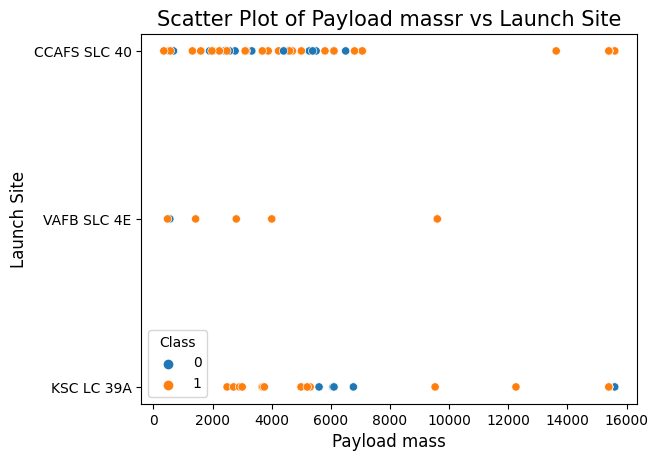

In [38]:
fig= sns.scatterplot(data=dm,x="PayloadMass",y='LaunchSite',hue='Class')
plt.xlabel('Payload mass', fontsize=12)
plt.ylabel('Launch Site', fontsize=12)
plt.title('Scatter Plot of Payload massr vs Launch Site', fontsize=15)

##### relationship between Flight Number and PayloadMass


In [39]:
fig=px.bar(dm,x='FlightNumber',y='PayloadMass',color='PayloadMass',template='plotly_dark')
fig.show()



##### relationship between Flight Number and LaunchSite



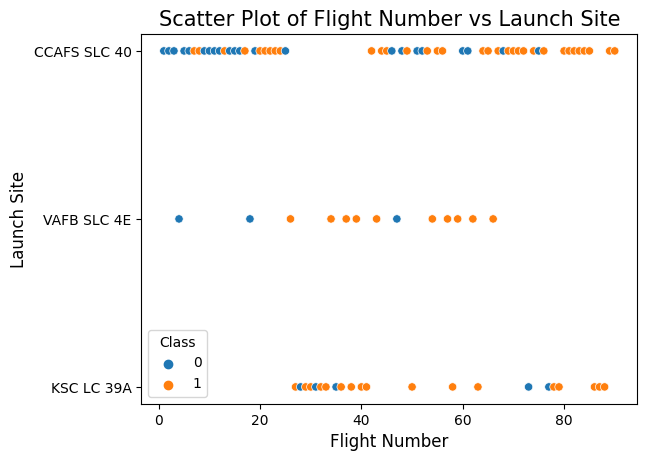

In [40]:
sns.scatterplot(x='FlightNumber', y='LaunchSite', hue='Class', data=dm)


plt.xlabel('Flight Number', fontsize=12)
plt.ylabel('Launch Site', fontsize=12)
plt.title('Scatter Plot of Flight Number vs Launch Site', fontsize=15)

plt.show()


##### relationship between orbit and class

In [41]:
orbit_class_mean = dm.groupby(['Orbit'])['Class'].mean().reset_index()

In [42]:
orbit_class_mean

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


In [43]:
fig=px.bar(orbit_class_mean,y='Orbit',x='Class',color='Class',template='plotly_dark')
fig.show()

##### relationship between Flight Number and orbit

Text(0.5, 1.0, 'Scatter Plot of Flight Number vs orbit')

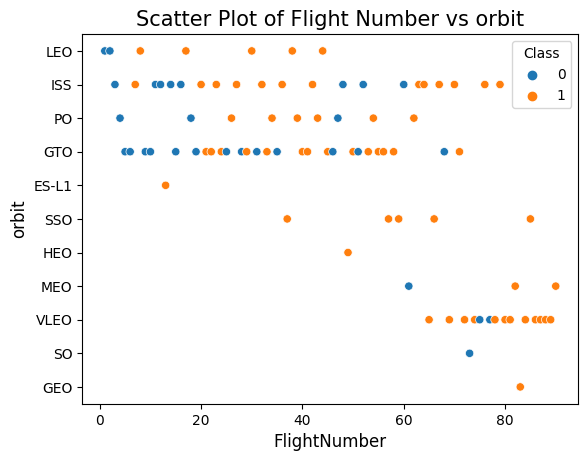

In [44]:
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=dm)


plt.xlabel('FlightNumber', fontsize=12)
plt.ylabel('orbit', fontsize=12)
plt.title('Scatter Plot of Flight Number vs orbit', fontsize=15)

##### relationship between payload and orbit

Text(0.5, 1.0, 'Scatter Plot of Payload Mass vs orbit')

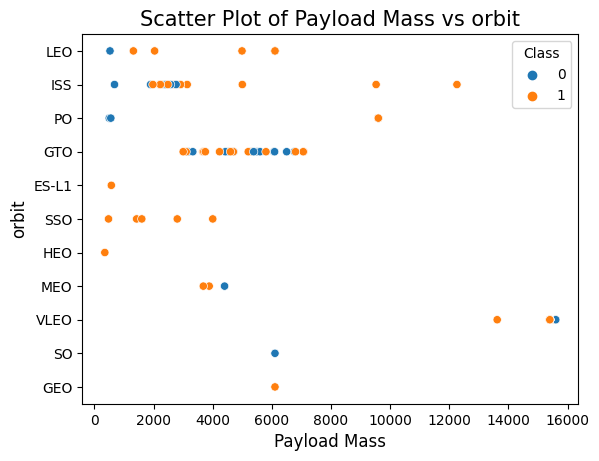

In [45]:
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=dm)


plt.xlabel('Payload Mass', fontsize=12)
plt.ylabel('orbit', fontsize=12)
plt.title('Scatter Plot of Payload Mass vs orbit', fontsize=15)

In [46]:
dm['Date']

0     2010-06-04
1     2012-05-22
2     2013-03-01
3     2013-09-29
4     2013-12-03
5     2014-01-06
6     2014-04-18
7     2014-07-14
8     2014-08-05
9     2014-09-07
10    2014-09-21
11    2015-01-10
12    2015-02-11
13    2015-04-14
14    2015-04-27
15    2015-06-28
16    2015-12-22
17    2016-01-17
18    2016-03-04
19    2016-04-08
20    2016-05-06
21    2016-05-27
22    2016-07-18
23    2016-08-14
24    2016-09-01
25    2017-01-14
26    2017-02-19
27    2017-03-16
28    2017-03-30
29    2017-05-01
30    2017-05-15
31    2017-06-03
32    2017-06-23
33    2017-06-25
34    2017-07-05
35    2017-08-14
36    2017-08-24
37    2017-09-07
38    2017-10-09
39    2017-10-11
40    2017-10-30
41    2017-12-15
42    2017-12-23
43    2018-01-08
44    2018-01-31
45    2018-03-06
46    2018-03-30
47    2018-04-02
48    2018-04-18
49    2018-05-11
50    2018-06-04
51    2018-06-29
52    2018-07-22
53    2018-07-25
54    2018-08-07
55    2018-09-10
56    2018-10-08
57    2018-11-15
58    2018-12-

In [47]:
dm['Date'].str.split('-')

0     [2010, 06, 04]
1     [2012, 05, 22]
2     [2013, 03, 01]
3     [2013, 09, 29]
4     [2013, 12, 03]
5     [2014, 01, 06]
6     [2014, 04, 18]
7     [2014, 07, 14]
8     [2014, 08, 05]
9     [2014, 09, 07]
10    [2014, 09, 21]
11    [2015, 01, 10]
12    [2015, 02, 11]
13    [2015, 04, 14]
14    [2015, 04, 27]
15    [2015, 06, 28]
16    [2015, 12, 22]
17    [2016, 01, 17]
18    [2016, 03, 04]
19    [2016, 04, 08]
20    [2016, 05, 06]
21    [2016, 05, 27]
22    [2016, 07, 18]
23    [2016, 08, 14]
24    [2016, 09, 01]
25    [2017, 01, 14]
26    [2017, 02, 19]
27    [2017, 03, 16]
28    [2017, 03, 30]
29    [2017, 05, 01]
30    [2017, 05, 15]
31    [2017, 06, 03]
32    [2017, 06, 23]
33    [2017, 06, 25]
34    [2017, 07, 05]
35    [2017, 08, 14]
36    [2017, 08, 24]
37    [2017, 09, 07]
38    [2017, 10, 09]
39    [2017, 10, 11]
40    [2017, 10, 30]
41    [2017, 12, 15]
42    [2017, 12, 23]
43    [2018, 01, 08]
44    [2018, 01, 31]
45    [2018, 03, 06]
46    [2018, 03, 30]
47    [2018, 

In [48]:
dm['year']= dm['Date'].str.split('-').str[0]
dm['month']= dm['Date'].str.split('-').str[1]
dm['date']= dm['Date'].str.split('-').str[2]


In [49]:
dm.drop( columns=['Date'],inplace=True)
dm

,FlightNumber,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,year,month,date
0,1,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010,06,04
1,2,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012,05,22
2,3,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013,03,01
3,4,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013,09,29
4,5,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013,12,03
5,6,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0,2014,01,06
6,7,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1,2014,04,18
7,8,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1,2014,07,14
8,9,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0,2014,08,05
9,10,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0,2014,09,07


##### sucess rate each year

In [50]:
mean = dm.groupby(['year'])['Class'].mean().reset_index()
mean

,year,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


In [51]:
fig=px.line(mean,x='year',y='Class',title='sucess rate')
fig.show()

# Launch Sites Locations Analysis

In [52]:

from folium.plugins import MarkerCluster

from folium.plugins import MousePosition



In [53]:
launch_sites_df = dm[['LaunchSite','Longitude','Latitude']].drop_duplicates().reset_index(drop=True)

In [54]:
initial_location = [launch_sites_df['Latitude'].mean(), launch_sites_df['Longitude'].mean()]
spacex_map = folium.Map(location=initial_location, zoom_start=4)
for index, row in launch_sites_df.iterrows():
    marker=folium.Marker(
    location=[row['Latitude'], row['Longitude']],
    popup=row['LaunchSite'],
    radius=15,
    color='blue',
    fill=True,
    fill_color='blue'
)
    marker.add_to(spacex_map)
spacex_map

#### success/failed launches for each site on the map

In [55]:
marker_cluster = MarkerCluster()

In [56]:
sites_df = dm[['LaunchSite','Longitude','Latitude','Class']].drop_duplicates().reset_index(drop=True)
sites_df

,LaunchSite,Longitude,Latitude,Class
0,CCAFS SLC 40,-80.577366,28.561857,0
1,VAFB SLC 4E,-120.610829,34.632093,0
2,CCAFS SLC 40,-80.577366,28.561857,1
3,VAFB SLC 4E,-120.610829,34.632093,1
4,KSC LC 39A,-80.603956,28.608058,1
5,KSC LC 39A,-80.603956,28.608058,0


In [57]:
def get_marker_color(launch_class):
    return 'green' if launch_class == 1 else 'red'


initial_location = [sites_df['Latitude'].mean(),sites_df['Longitude'].mean()]
site_map = folium.Map(location=initial_location, zoom_start=4)
marker_cluster = MarkerCluster().add_to(site_map)

for index, record in sites_df.iterrows():

    marker_color = get_marker_color(record['Class'])
    

    marker = folium.Marker(
        location=[record['Latitude'], record['Longitude']],
        popup=f"{record['LaunchSite']}<br>Outcome: {'Success' if record['Class'] == 1 else 'Failure'}",
        icon=folium.Icon( color=marker_color, icon='rocket')
    )
    
    marker_cluster.add_child(marker)




In [58]:
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

# Machine Learning Prediction

In [12]:

from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [60]:
dm.head(4)

,FlightNumber,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,year,month,date
0,1,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010,06,04
1,2,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012,05,22
2,3,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013,03,01
3,4,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013,09,29


In [61]:

X= pd.read_csv("C:/Users/akrit/Downloads/dataset_part_3.csv")

Y = dm['Class'].to_numpy()



## correlation between different variable of the dataset

In [62]:
cat= dp.select_dtypes(exclude=['number']).columns
cat
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for col in cat:
    dp[col]=l.fit_transform(dp[col])
    
    
d= pd.DataFrame({"mean":dp.mean(),"median":dp.median(),"mode":dp.mode().iloc[0].values})  

mm=X
m= pd.DataFrame({"mean":mm.mean(),"median":mm.median(),"mode":mm.mode().iloc[0].values})  
# d.var()
# m.var()








In [63]:
col = [
    "Serial_B0003",
    "Serial_B0005",
    "Serial_B0007",
    "Serial_B1003",
    "Serial_B1004",
    "Serial_B1005",
    "Serial_B1006",
    "Serial_B1007",
    "Serial_B1008",
    "Serial_B1010",
    "Serial_B1011",
    "Serial_B1012",
    "Serial_B1013",
    "Serial_B1015",
    "Serial_B1016",
    "Serial_B1017",
    "Serial_B1018",
    "Serial_B1019",
    "Serial_B1020",
    "Serial_B1021",
    "Serial_B1022",
    "Serial_B1023",
    "Serial_B1025",
    "Serial_B1026",
    "Serial_B1028",
    "Serial_B1029",
    "Serial_B1030",
    "Serial_B1031",
    "Serial_B1032",
    "Serial_B1034",
    "Serial_B1035",
    "Serial_B1036",
    "Serial_B1037",
    "Serial_B1038",
    "Serial_B1039",
    "Serial_B1040",
    "Serial_B1041",

]
col2=  [  "Serial_B1042",
    "Serial_B1043",
    "Serial_B1044",
    "Serial_B1045",
    "Serial_B1046",
    "Serial_B1047",
    "Serial_B1048",
    "Serial_B1049",
    "Serial_B1050",
    "Serial_B1051",
    "Serial_B1054",
    "Serial_B1056",
    "Serial_B1058",
    "Serial_B1059",
    "Serial_B1060",
    "Serial_B1062"]

# mm.drop(columns=col,inplace=True)
# mm.drop(columns=col2,inplace=True)

mm


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,6.0,3325.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,7.0,2296.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,8.0,1316.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,9.0,4535.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0

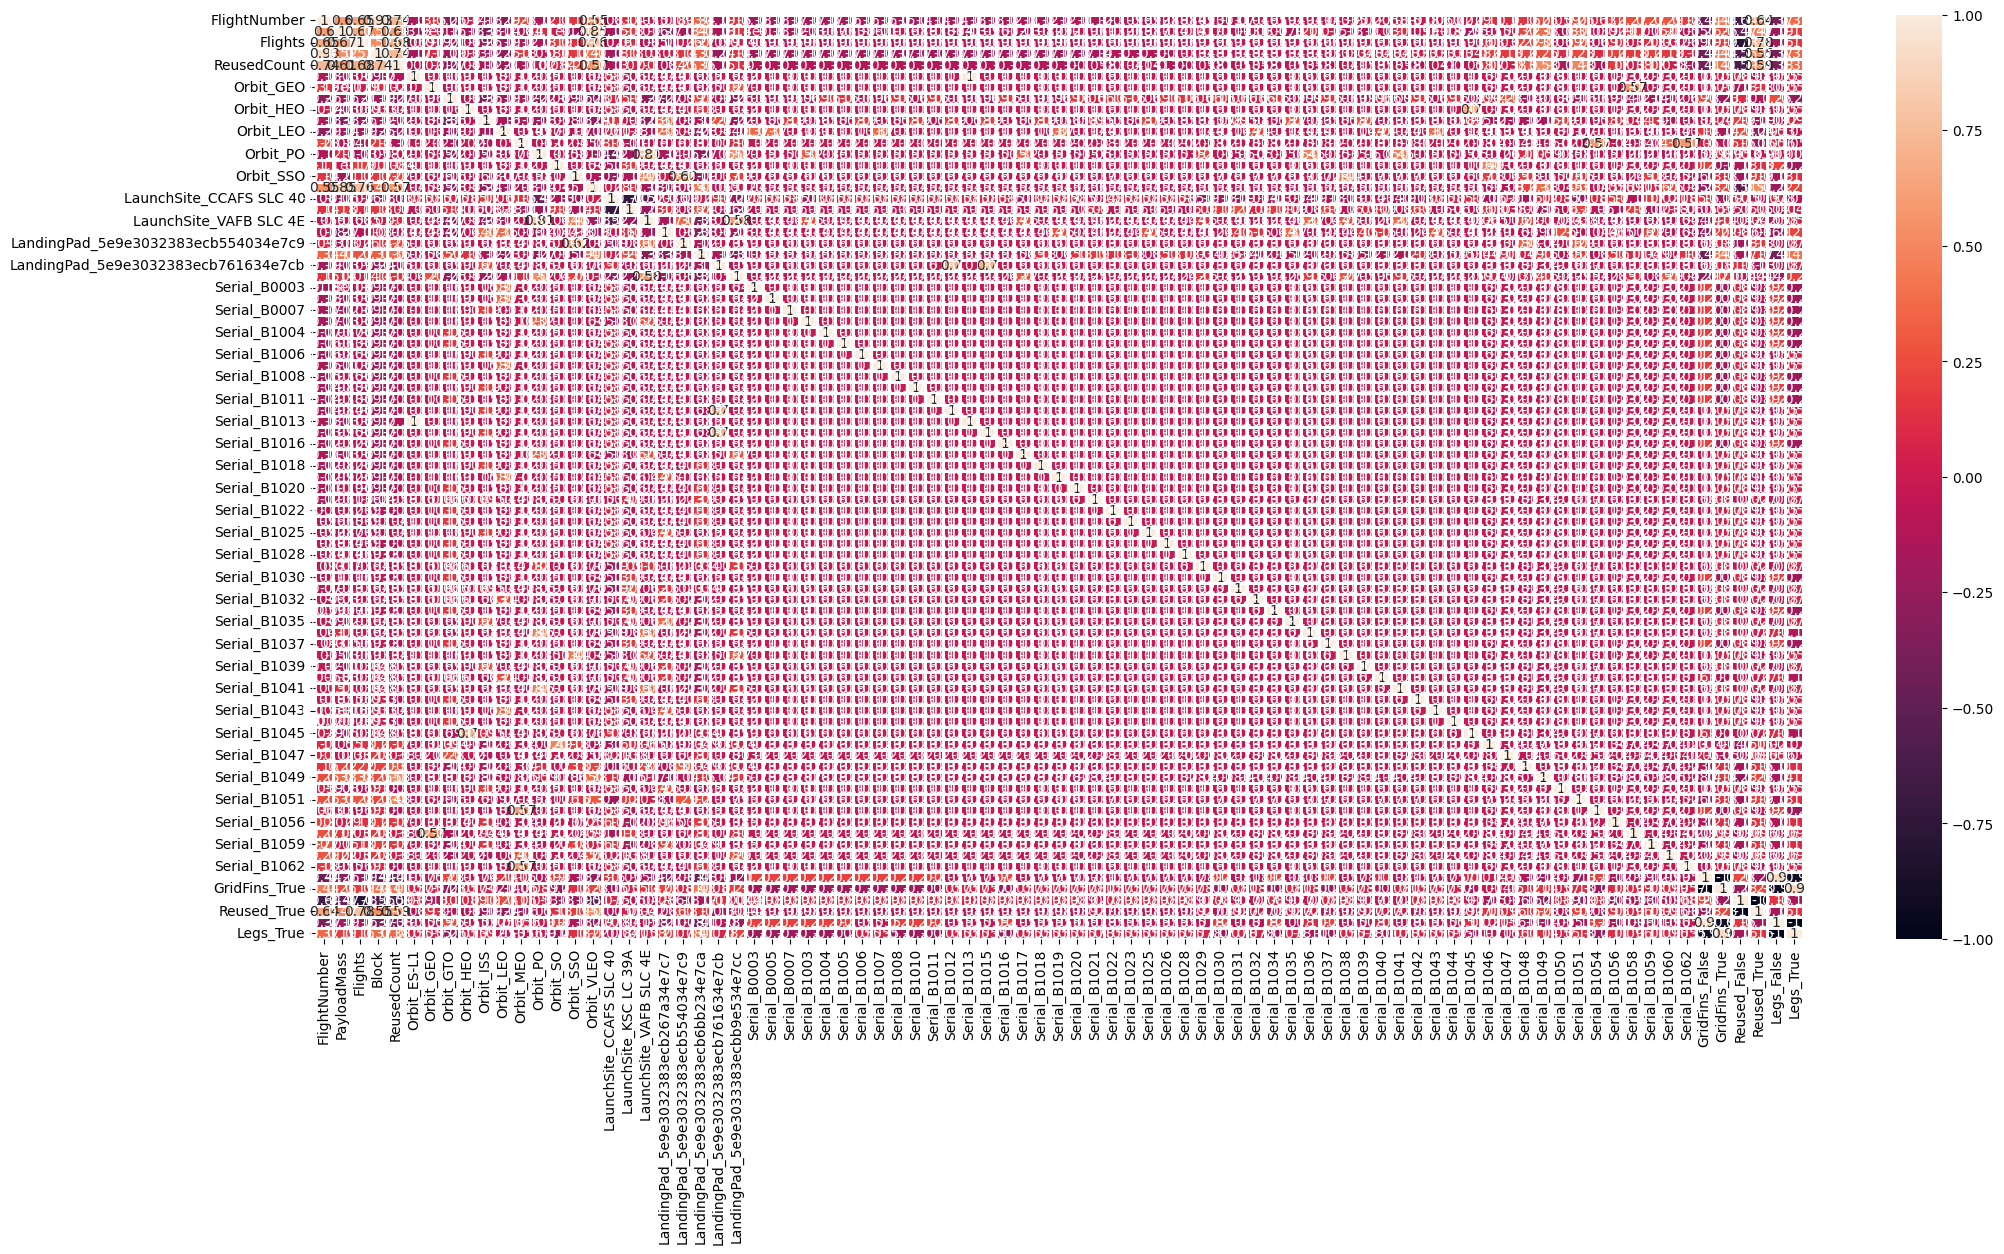

In [64]:
plt.figure(figsize = (24, 12))

corr = mm.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [65]:
X

Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [66]:
from sklearn import preprocessing



In [67]:
x= preprocessing.StandardScaler().fit(X).transform(X)

In [68]:
x[0:5]
x[:,:10]

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
         1.81265393e+00],
       [-1.59743435e+00, -1.20058661e+00, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01],
       [-1.55894196e+00, -6.28670558e-01, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01,  1.52752523e+00, -1.05999788e-01,
        -5.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [70]:
y_test.shape

(18,)

In [71]:
reg = LogisticRegression()

parameter = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}


logreg_cv = GridSearchCV(reg, parameter, cv=10)


logreg_cv.fit(X_train, y_train)


print("Best parameters found: ", logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Best parameters found:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy : 0.8196428571428571


In [72]:
def plot_confusion_matrix(y,y_predict):
    

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [73]:
acurracy = logreg_cv.score(X_test,y_test)
print("accuracy on test data:",acurracy)

accuracy on test data: 0.8333333333333334


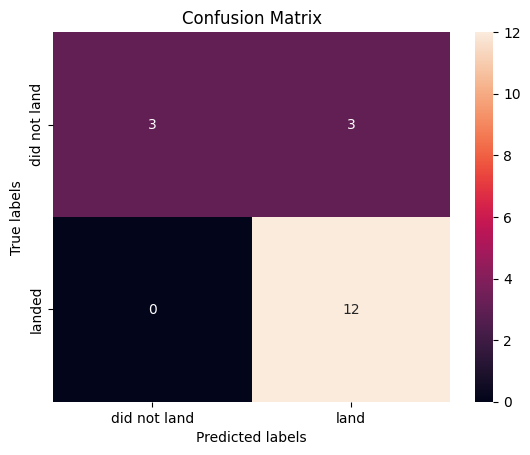

In [74]:
yhat=logreg_cv.predict(X_test)

plot_confusion_matrix(y_test,yhat)

In [75]:
# svm = SVC()
# parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
#               'C': np.logspace(-3, 3, 5),
#               'gamma':np.logspace(-3, 3, 5)}

In [76]:
# print("Best parameters found: ", svm_cv.best_params_)

### decision tree


In [77]:
parameter={'criterion' : ['gini','entropy'],
           'splitter':['best','random'],
           'max_depth':[2*n for n in range (1,10)],
           'max_features':['log2', 'sqrt', None],
        #    'max_features':['log2', 'sqrt','auto', None],
           
           'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10]
           }

tree= DecisionTreeClassifier()

In [78]:
grid= GridSearchCV(tree,parameter,cv=10)

In [79]:

tree_cv=grid.fit(X_train,y_train)

In [80]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)


print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8767857142857143


In [81]:
accu=tree_cv.score(X_test,y_test)

In [82]:
yhat=tree_cv.predict(X_test)


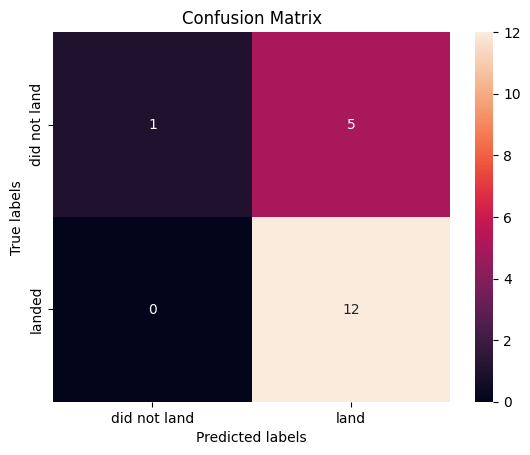

In [83]:

plot_confusion_matrix(y_test,yhat)

In [84]:
from sklearn.metrics import classification_report


confusion= confusion_matrix(y_test,yhat)
clf_report= classification_report(y_test,yhat)




print("the accuracy score is ",accu)
print("the confusion matrix is \n",confusion)
print("the classification report is \n", clf_report)




the accuracy score is  0.7222222222222222
the confusion matrix is 
 [[ 1  5]
 [ 0 12]]
the classification report is 
               precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.71      1.00      0.83        12

    accuracy                           0.72        18
   macro avg       0.85      0.58      0.56        18
weighted avg       0.80      0.72      0.65        18



In [85]:
model= pd.DataFrame({
    'model':['LogisticRegression','DecisionTreeClassifier'],
    'score':[acurracy,accu]
})


model.sort_values(by='score')

,model,score
1,DecisionTreeClassifier,0.722222
0,LogisticRegression,0.833333


In [86]:


px.bar(data_frame = model, x = 'score', y = 'model', color = 'score', template = 'plotly_dark', title = 'Models Comparison')